# Tratameno de dados desbalanceados - PARTE II - OverSampling

In [24]:
import pandas as pd
import numpy as np
import plotly as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import seaborn as sns

In [3]:
dt = pd.read_csv('../Dados/Bases_de_Dados/census.csv')
dt

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
dt.isnull().sum().count

<bound method Series.count of age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64>

In [6]:
np.unique(dt['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<AxesSubplot:xlabel='income', ylabel='count'>

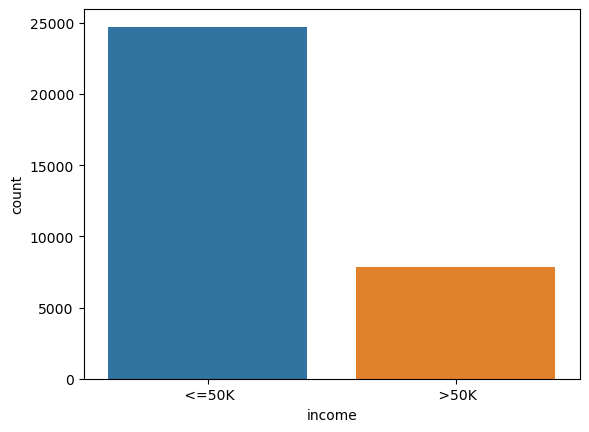

In [7]:
sns.countplot(x = dt['income'])

In [8]:
data = dt.rename({'income': 'salary'}, axis = 1)
data

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
X = data.iloc[:, 0:14 ].values
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [10]:
y = data.iloc[:, 14].values
y 

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# TRATAMENTO DE CATEGORICOS COM LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder # Biblioteca para tratamento de categoricos

In [12]:
# DEFINICAO DA VARIAVEL PARA CONVERTER 
Lb_workclass = LabelEncoder()
Lb_education = LabelEncoder()
Lb_marital_status = LabelEncoder()
Lb_occupation = LabelEncoder()
Lb_relationship = LabelEncoder()
Lb_race = LabelEncoder()
Lb_sex= LabelEncoder()
Lb_native_country = LabelEncoder()

In [13]:
X[:, 1] = Lb_workclass.fit_transform(X[:, 1])
X[:, 3] = Lb_education.fit_transform(X[:, 3])
X[:, 5] = Lb_marital_status.fit_transform(X[:, 5])
X[:, 6] = Lb_occupation.fit_transform(X[:, 6])
X[:, 7] = Lb_relationship.fit_transform(X[:, 7])
X[:, 8] = Lb_race.fit_transform(X[:, 8])
X[:, 9] = Lb_sex.fit_transform(X[:, 9])
X[:, 13] = Lb_native_country.fit_transform(X[:, 13])

In [14]:
X.shape

(32561, 14)

# Transformacao de colunas com OneHot

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
OneTransform = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), 
                                                  [1, 3, 5, 6, 7,8, 9, 13])], remainder='passthrough')

In [17]:
X[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [18]:
# CONVERSAO DOS DADOS EM ARRAY
X = OneTransform.fit_transform(X).toarray()

In [19]:
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [20]:
X.shape

(32561, 108)

# ESCALONAMENTO

In [21]:
from sklearn.preprocessing import StandardScaler
conversor = StandardScaler()
X = conversor.fit_transform(X)

In [55]:
X

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

In [56]:
np.unique(y, return_counts=True) #ANTES DE SMOTE

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

# Aplicacao da tecnica Tomek_links para tratamento de desbalanceados

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Tecnica de sobreamostragem - aplica-se apos a divisao de dados

In [58]:
# como o proposito desta tecnica eh reducao da classe majoritaria, podemos aplica-la antes da divisao entre os dados de teste e treinamento
ST = SMOTE()
Xu, yu = ST.fit_resample(X_train, y_train)

In [59]:
np.unique(yu, return_counts=True) # APOS APLICACAO DA TECNICA SMOTE

(array([' <=50K', ' >50K'], dtype=object), array([17313, 17313], dtype=int64))

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8538233186610708

In [61]:
previsao = rf.predict(X_test)
previsao

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.63      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769



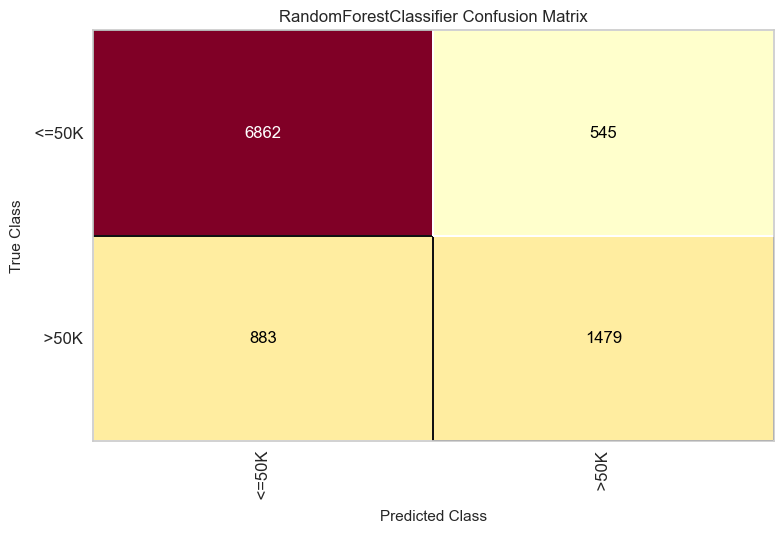

In [64]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();